# 資料說明:

機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集

安隆公司曾是一間能源公司，2001 年破產前是世界上最大的電力、天然氣及電信公司之一。擁有上千億資產的公司於 2002 年竟然在短短幾周內宣告破產，才揭露其財報在多年以來均是造假的醜聞。在本資料集中你將會扮演偵探的角色，透過高層經理人內部的 mail 來往的情報以及薪資、股票等財務特徵，訓練出一個機器學習模型來幫忙你找到可疑的詐欺犯罪者是誰! 我們已經先幫你找到幾位犯罪者 (Person-of-Interest, poi) 與清白的員工，請利用這些訓練資料來訓練屬於自己的詐欺犯機器學習模型吧!

# 資料來源:

https://www.kaggle.com/c/2020-ml100marathon-midterm/data

# 關鍵問題:

參考:
https://docs.google.com/document/d/1XxV5_gN0E4oEYvk4ovYwepjNxCAMdAFqcSacHMrd7U0/edit?usp=sharing


## STEP1:載入套件 & 讀取資料

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [52]:
train = pd.read_csv('C:/Users/USER/OneDrive/Documents/ML100Days/Midtern Exam_Kaggle_Project/train_data.csv')
test = pd.read_csv('C:/Users/USER/OneDrive/Documents/ML100Days/Midtern Exam_Kaggle_Project/test_features.csv')
sample_submission = pd.read_csv('C:/Users/USER/OneDrive/Documents/ML100Days/Midtern Exam_Kaggle_Project/sample_submission.csv')

In [53]:
print(train.columns.value_counts().sum())  #目標變數為"poi"
print(train.columns)
print(test.columns.value_counts().sum())
print(test.columns)

22
Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')
21
Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')


In [54]:
train_Y = train['poi'] #目標變數
ids = test['name']  #最後繳交檔案時需要用到

#先等前處理和特徵工程處理完再做切分
#train = train.drop(['name', 'poi'] , axis=1)
#test = test.drop(['name'] , axis=1)
enron = pd.concat([train,test])

print(train.shape)
print(test.shape)
print(enron.shape)

enron.head()

(113, 22)
(33, 21)
(146, 22)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


## STEP2:資料前處理

In [55]:
enron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       146 non-null    object 
 1   bonus                      82 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   deferred_income            49 non-null     float64
 4   director_fees              17 non-null     float64
 5   email_address              111 non-null    object 
 6   exercised_stock_options    102 non-null    float64
 7   expenses                   95 non-null     float64
 8   from_messages              86 non-null     float64
 9   from_poi_to_this_person    86 non-null     float64
 10  from_this_person_to_poi    86 non-null     float64
 11  loan_advances              4 non-null      float64
 12  long_term_incentive        66 non-null     float64
 13  other                      93 non-null     float64


### 檢查 DataFrame 空缺值的狀態

In [56]:
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data)
    
na_check(enron)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_messages,41.095890
from_poi_to_this_person,41.095890
from_this_person_to_poi,41.095890


# 1.

Some of our features have lots of missing data, so those may be ones that we can remove.

Features like:

<li>"restricted_stock_deferred" 87.67%</li>
<li>"loan_advances" 97.26%</li>
<li>"director_fees" 88.35%</li>

# 2.

There are also a few features that seem to be giving us the same information, like

<li>"shared_receipt_with_poi"</li>
<li>"to_messages"</li>
<li>"from_messages"</li>
<li>"from_this_person_to_poi"</li>
<li>"from_poi_to_this_person"</li>

all tell us about the person's e-mail behavior and all have the same data count, 86.

#  3.

Let's follow the money! Features that will give us that money trail will be 

<li>"salary"</li>
<li>"total_payments"</li>
<li>"exercised_stock_options"</li>
<li>"bonus"</li>
<li>"restricted_stock"</li>
<li>"total_stock_value"</li>

### 遺失值填補

In [57]:
enron = enron.fillna(0)
enron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       146 non-null    object 
 1   bonus                      146 non-null    float64
 2   deferral_payments          146 non-null    float64
 3   deferred_income            146 non-null    float64
 4   director_fees              146 non-null    float64
 5   email_address              146 non-null    object 
 6   exercised_stock_options    146 non-null    float64
 7   expenses                   146 non-null    float64
 8   from_messages              146 non-null    float64
 9   from_poi_to_this_person    146 non-null    float64
 10  from_this_person_to_poi    146 non-null    float64
 11  loan_advances              146 non-null    float64
 12  long_term_incentive        146 non-null    float64
 13  other                      146 non-null    float64


### 檢查 DataFrame 離群值的狀態

## STEP4:特徵工程

### 自建一些和金錢相關的變數

In [8]:
#added/combined feature, total bonus and exercised_stock_options
enron['total_bonus'] = enron['bonus'].fillna(0.0) + enron['exercised_stock_options'].fillna(0.0)

#added feature, scaled total compensation
enron['total_millions'] = (enron['total_payments'].fillna(0.0) + enron['total_stock_value'].fillna(0.0))/1000000

In [9]:
enron['poi'].value_counts()

False    100
True      13
Name: poi, dtype: int64

嫌疑人數目遠低於非嫌疑人數目，有資料不平衡的問題

In [10]:
enron.columns

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value', 'total_bonus', 'total_millions'],
      dtype='object')

In [11]:
# 篩選出非嫌疑人的資訊

non_poi = enron[enron.poi.isin([False])]  # isin()接受一個列表，判斷該列中元素是否在列表中
non_poi

#另法
#non_poi2 = enron[enron['poi']==False]
#non_poi2

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_bonus,total_millions
13,GOLD JOSEPH,750000.0,NaN,NaN,NaN,joe.gold@enron.com,436515.0,NaN,NaN,NaN,...,False,441096.0,NaN,272880.0,NaN,NaN,2146973.0,877611.0,1186515.0,3.024584
14,ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,...,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,5904541.0,6.213983
15,BLACHMAN JEREMY M,850000.0,NaN,NaN,NaN,jeremy.blachman@enron.com,765313.0,84208.0,14.0,25.0,...,False,189041.0,NaN,248546.0,2326.0,2475.0,2014835.0,954354.0,1615313.0,2.969189
16,GAHN ROBERT S,509870.0,73122.0,-1042.0,NaN,NaN,83237.0,50080.0,NaN,NaN,...,False,235370.0,NaN,192008.0,NaN,NaN,900585.0,318607.0,593107.0,1.219192
17,WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,139130.0,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,139130.0,139130.0,0.139130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,STABLER FRANK,500000.0,NaN,NaN,NaN,frank.stabler@enron.com,NaN,16514.0,NaN,NaN,...,False,511734.0,NaN,239502.0,NaN,NaN,1112087.0,511734.0,500000.0,1.623821
109,BROWN MICHAEL,NaN,NaN,NaN,NaN,michael.brown@enron.com,NaN,49288.0,41.0,13.0,...,False,NaN,NaN,NaN,761.0,1486.0,49288.0,NaN,0.0,0.049288
110,PICKERING MARK R,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,...,False,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0,328798.0,1.415488
111,HAUG DAVID L,NaN,NaN,NaN,NaN,david.haug@enron.com,NaN,475.0,19.0,4.0,...,False,2217299.0,NaN,NaN,471.0,573.0,475.0,2217299.0,0.0,2.217774


In [12]:
#篩選出嫌疑人的資訊

yes_poi = enron[enron.poi.isin([True])]
yes_poi

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_bonus,total_millions
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0,21544175.0,23.047589
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0,24850000.0,34.776388
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0,1824396.0,4.497501
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0,800000.0,3.637644
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0,1250000.0,1.765324
5,HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0,30766064.0,30.857157
6,YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,...,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0,8308552.0,12.245058
7,COLWELL WESLEY,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,...,True,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0,1200000.0,2.188586
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0,41348384.0,152.669871
9,GLISAN JR BEN F,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,...,True,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0,984728.0,2.050830


### 分別看一下嫌疑人與非嫌疑人的金錢資訊

In [14]:
#看非poi的人的金錢資訊:

non_poi_money = non_poi[['salary','bonus','exercised_stock_options',
                         'total_stock_value','total_payments',
                         'restricted_stock']].describe()

non_poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,restricted_stock
count,61.000000,5.000000e+01,7.200000e+01,8.500000e+01,8.300000e+01,7.000000e+01
mean,245779.770492,9.778724e+05,1.736226e+06,2.288793e+06,1.462239e+06,1.026421e+06
std,105087.772320,1.264121e+06,2.446771e+06,3.570942e+06,1.732508e+06,2.003563e+06
min,477.000000,7.000000e+04,3.285000e+03,-4.409300e+04,1.480000e+02,4.409300e+04
25%,199157.000000,4.000000e+05,3.720912e+05,3.849300e+05,2.285650e+05,2.415042e+05
50%,250100.000000,7.000000e+05,7.624350e+05,9.558730e+05,1.086821e+06,4.293575e+05
75%,275101.000000,9.750000e+05,1.820836e+06,2.217299e+06,1.891293e+06,8.935478e+05
max,655037.000000,8.000000e+06,1.536417e+07,2.381793e+07,1.042576e+07,1.384707e+07


In [15]:
#看poi的人的金錢資訊:
yes_poi_money = yes_poi[['salary','bonus','exercised_stock_options',
                         'total_stock_value','total_payments',
                         'restricted_stock']].describe()

yes_poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,restricted_stock
count,1.200000e+01,1.100000e+01,9.000000e+00,1.300000e+01,1.300000e+01,1.200000e+01
mean,4.168598e+05,1.918182e+06,1.297592e+07,1.162399e+07,9.797537e+06,2.860721e+06
std,3.255288e+05,2.228483e+06,1.345505e+07,1.568175e+07,2.825436e+07,4.200915e+06
min,1.584030e+05,2.000000e+05,3.847280e+05,1.260270e+05,9.109300e+04,1.260270e+05
25%,2.362180e+05,7.000000e+05,1.624396e+06,9.850320e+05,1.099100e+06,6.221360e+05
50%,2.817585e+05,1.200000e+06,8.308552e+06,1.920055e+06,1.587421e+06,1.116675e+06
75%,4.256515e+05,1.525000e+06,1.979418e+07,2.254254e+07,2.424083e+06,2.955324e+06
max,1.111258e+06,7.000000e+06,3.434838e+07,4.911008e+07,1.035598e+08,1.476169e+07


### 自建一些和訊息相關的變數

In [18]:
#added feature, fraction of e-mails to and from poi

enron['fraction_to_poi'] = enron['from_this_person_to_poi'].fillna(0.0)/enron['from_messages'].fillna(0.0)
enron['fraction_from_poi'] = enron['from_poi_to_this_person'].fillna(0.0)/enron['to_messages'].fillna(0.0)

In [20]:
non_poi = enron[enron.poi.isin([False])]  # isin()接受一個列表，判斷該列中元素是否在列表中
yes_poi = enron[enron.poi.isin([True])]

### 分別看一下嫌疑人與非嫌疑人的郵件資訊

In [21]:
#看非poi的人的郵件資訊:

non_poi_email_behavior = non_poi[['shared_receipt_with_poi','to_messages',
                                  'from_messages','fraction_from_poi',
                                 'fraction_to_poi']].describe()

non_poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1055.500000,2181.839286,815.928571,0.034720,0.130899
std,1210.372565,2988.596556,2219.689043,0.038110,0.191541
min,2.000000,57.000000,12.000000,0.000000,0.000000
25%,125.000000,502.000000,19.000000,0.007485,0.000000
50%,561.500000,920.000000,47.000000,0.020712,0.048971
75%,1759.250000,2692.250000,224.000000,0.050705,0.217592
max,4527.000000,15149.000000,14368.000000,0.161064,1.000000


In [22]:
#看poi的人的郵件資訊:

yes_poi_email_behavior = yes_poi[['shared_receipt_with_poi','to_messages',
                                  'from_messages','fraction_from_poi',
                                 'fraction_to_poi']].describe()

yes_poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,1459.000000,1995.666667,60.444444,0.053177,0.328700
std,802.494704,1343.544566,43.243818,0.036579,0.127503
min,91.000000,225.000000,16.000000,0.022325,0.173611
25%,874.000000,905.000000,36.000000,0.026355,0.245902
50%,1258.000000,1758.000000,40.000000,0.046409,0.277778
75%,2188.000000,2598.000000,82.000000,0.059565,0.375000
max,2411.000000,4273.000000,144.000000,0.136519,0.585366


### <strong>直接比較poi與非poi的差異:</strong>

In [23]:
#difference in non-poi compensation and poi compensation

difference_in_money = yes_poi_money - non_poi_money
difference_in_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,restricted_stock
count,-49.000000,-39.000000,-6.300000e+01,-7.200000e+01,-7.000000e+01,-5.800000e+01
mean,171080.062842,940309.418182,1.123969e+07,9.335202e+06,8.335298e+06,1.834301e+06
std,220441.010200,964361.535968,1.100828e+07,1.211080e+07,2.652185e+07,2.197352e+06
min,157926.000000,130000.000000,3.814430e+05,1.701200e+05,9.094500e+04,8.193400e+04
25%,37061.000000,300000.000000,1.252305e+06,6.001020e+05,8.705350e+05,3.806318e+05
50%,31658.500000,500000.000000,7.546117e+06,9.641820e+05,5.006000e+05,6.873175e+05
75%,150550.500000,550000.000000,1.797334e+07,2.032524e+07,5.327900e+05,2.061777e+06
max,456221.000000,-1000000.000000,1.898422e+07,2.529215e+07,9.313404e+07,9.146200e+05




從平均值欄位可以看出，每一個金錢資訊欄位的差異都非常明顯



In [24]:
#difference in non-poi email behavior and poi behavior

difference_in_email = yes_poi_email_behavior - non_poi_email_behavior
difference_in_email

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,-47.000000,-47.000000,-47.000000,-47.000000,-47.000000
mean,403.500000,-186.172619,-755.484127,0.018458,0.197801
std,-407.877861,-1645.051990,-2176.445226,-0.001531,-0.064038
min,89.000000,168.000000,4.000000,0.022325,0.173611
25%,749.000000,403.000000,17.000000,0.018870,0.245902
50%,696.500000,838.000000,-7.000000,0.025696,0.228807
75%,428.750000,-94.250000,-142.000000,0.008860,0.157408
max,-2116.000000,-10876.000000,-14224.000000,-0.024546,-0.414634




嫌疑人與非嫌疑人相比之下，有更多的票據互享、更少的訊息來往



In [25]:
#poi's name, salary, bonus, stock options, total bonus and options, from messages, and fraction to poi,
# ordered by total descending.

yes_poi[['name','salary','bonus','exercised_stock_options',
          'total_bonus','total_millions','from_messages',
          'fraction_to_poi']].sort_values('total_millions',ascending=False)

,name,salary,bonus,exercised_stock_options,total_bonus,total_millions,from_messages,fraction_to_poi
8,LAY KENNETH L,1072321.0,7000000.0,34348384.0,41348384.0,152.669871,36.0,0.444444
1,SKILLING JEFFREY K,1111258.0,5600000.0,19250000.0,24850000.0,34.776388,108.0,0.277778
5,HIRKO JOSEPH,NaN,NaN,30766064.0,30766064.0,30.857157,NaN,NaN
0,RICE KENNETH D,420636.0,1750000.0,19794175.0,21544175.0,23.047589,18.0,0.222222
6,YEAGER F SCOTT,158403.0,NaN,8308552.0,8308552.0,12.245058,NaN,NaN
2,SHELBY REX,211844.0,200000.0,1624396.0,1824396.0,4.497501,39.0,0.358974
12,FASTOW ANDREW S,440698.0,1300000.0,NaN,1300000.0,4.218495,NaN,NaN
3,KOPPER MICHAEL J,224305.0,800000.0,NaN,800000.0,3.637644,NaN,NaN
10,KOENIG MARK E,309946.0,700000.0,671737.0,1371737.0,3.507476,61.0,0.245902
11,RIEKER PAULA H,249201.0,700000.0,1635238.0,2335238.0,3.017987,82.0,0.585366


## STEP4:EDA

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [27]:
features_using=[]

poi
False    245779.770492
True     416859.833333
Name: salary, dtype: float64


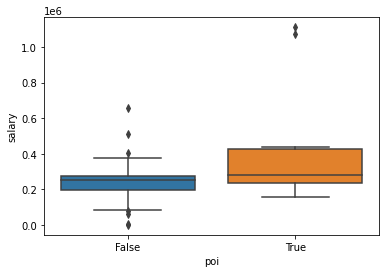

In [29]:
#先看薪資:

average_salary = enron.groupby('poi').mean()['salary']
print(average_salary)

sns.boxplot(x='poi', y='salary', data=enron)

#poi有明顯較高的薪資 >> 好的特徵，可以用!
features_using.append('salary')

poi
False    9.778724e+05
True     1.918182e+06
Name: bonus, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='bonus'>

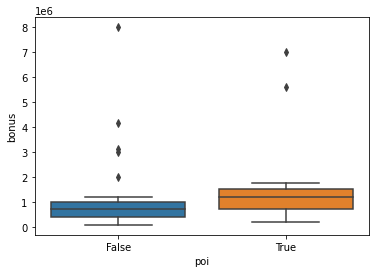

In [30]:
#看看獎金:

average_bonus = enron.groupby('poi').mean()['bonus']
print(average_bonus)

sns.boxplot(x='poi',y='bonus',data=enron)

#poi的bonus較高，但好像有離群值?

In [31]:
# oulier in bonus:

enron[(enron['bonus']>6000000)][['name','salary','bonus',
                                 'exercised_stock_options',
                                 'restricted_stock','total_stock_value','poi']]

,name,salary,bonus,exercised_stock_options,restricted_stock,total_stock_value,poi
8,LAY KENNETH L,1072321.0,7000000.0,34348384.0,14761694.0,49110078.0,True
33,LAVORATO JOHN J,339288.0,8000000.0,4158995.0,1008149.0,5167144.0,False
20,TOTAL,26704229.0,97343619.0,311764000.0,130322299.0,434509511.0,NaN


poi
False    8.345637e+05
True     1.410000e+06
Name: bonus, dtype: float64


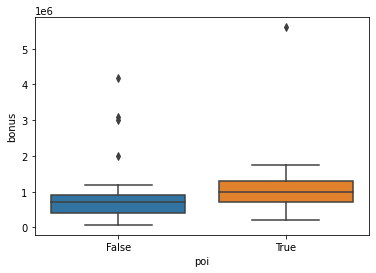

In [32]:
#拿掉離群值對分布狀況影響還好而已

outlier_TakeOut = enron[(enron['bonus']<6000000)][['name','salary','bonus',
                                 'exercised_stock_options',
                                 'restricted_stock','total_stock_value','poi']]

average_bonus2 = outlier_TakeOut.groupby('poi').mean()['bonus']
print(average_bonus2)

sns.boxplot(x='poi',y='bonus',data=outlier_TakeOut)

#去掉離群值之後，poi的bonus仍然顯著較高 >> 好特徵，可用!
features_using.append('bonus')

poi
False    1.462239e+06
True     9.797537e+06
Name: total_payments, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='total_payments'>

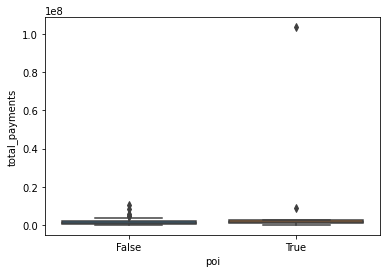

In [33]:
#看看總支付額:

average_TotalPayments = enron.groupby('poi').mean()['total_payments']
print(average_TotalPayments)

sns.boxplot(x='poi',y='total_payments',data=enron)

#這項依然是poi高出許多
#有個超大離群值快突破天際了

In [34]:
enron[(enron['total_payments']>40000000)][['name','total_payments','poi']]

,name,total_payments,poi
8,LAY KENNETH L,103559793.0,True
20,TOTAL,309886585.0,NaN


poi
False    1.462239e+06
True     1.984015e+06
Name: total_payments, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='total_payments'>

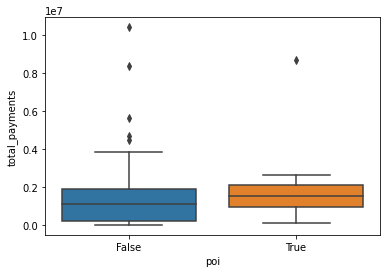

In [35]:
#take Ken Lay out of the poi boxplot

kl_not_in = enron[(enron['total_payments']<40000000)]

average_TotalPayments2 = kl_not_in.groupby('poi').mean()['total_payments']
print(average_TotalPayments2)

sns.boxplot(x='poi',y='total_payments',data=kl_not_in)

#去掉離群值之後好像就差沒多少了 >> 可以不用這個特徵

poi
False    1.736226e+06
True     1.297592e+07
Name: exercised_stock_options, dtype: float64


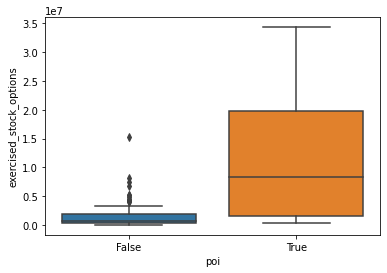

In [36]:
#看看股票期權行使
# Exercise 指的是購買期權從而使期權變成股票
# https://kknews.cc/zh-tw/tech/2aqeyk9.html

Average_OptionValue = enron.groupby('poi').mean()['exercised_stock_options']
print(Average_OptionValue)

sns.boxplot(x='poi',y='exercised_stock_options',data=enron)

#超級顯著的差異 >> 好特徵，該用!!
features_using.append('exercised_stock_options')

poi
False    1.739019e+06
True     1.060641e+07
Name: total_bonus, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='total_bonus'>

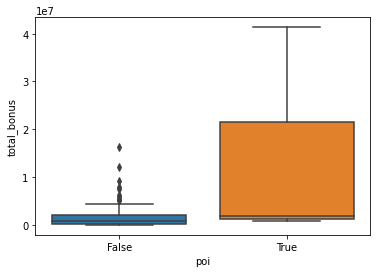

In [37]:
#看看Total Bonus and Exercised Stock Options:

average_total_sbe = enron.groupby('poi').mean()['total_bonus']
print(average_total_sbe)

sns.boxplot(x='poi',y='total_bonus',data=enron)

#剛剛已經採用了bonus變數，再用這個可能有重複特徵之嫌 >> 不用

poi
False    2.288793e+06
True     1.162399e+07
Name: total_stock_value, dtype: float64


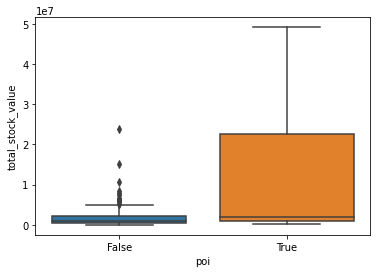

In [38]:
#再看Total Stock Value:

average_stockvalue = enron.groupby('poi').mean()['total_stock_value']
print(average_stockvalue)

sns.boxplot(x='poi',y='total_stock_value',data=enron)

#顯著特徵，可用
features_using.append('total_stock_value')

poi
False     3.159132
True     21.421531
Name: total_millions, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='total_millions'>

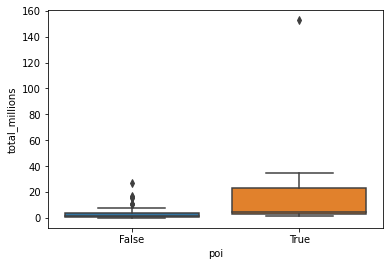

In [39]:
#接著是Total Payments and Stock Value in Millions:

average_total_comp = enron.groupby('poi').mean()['total_millions']
print(average_total_comp)

sns.boxplot(x='poi',y='total_millions',data= enron)

poi
False     3.159132
True     10.484170
Name: total_millions, dtype: float64


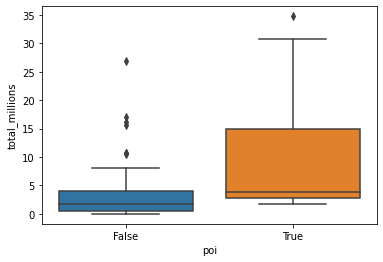

In [40]:
# Let's try that one again without Ken Lay(outlier)...

kl_not_in = enron[enron['total_millions']<140]

average_total_comp2 = kl_not_in.groupby('poi').mean()['total_millions']
print(average_total_comp2)

sns.boxplot(x='poi',y='total_millions',data= kl_not_in)

#顯著特徵，可用
features_using.append('total_millions')

poi
False    1055.5
True     1459.0
Name: shared_receipt_with_poi, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='shared_receipt_with_poi'>

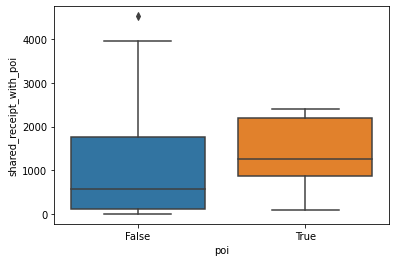

In [41]:
#再來是Shared Receipt with POI:

average_shared_receipt = enron.groupby('poi').mean()['shared_receipt_with_poi']
print(average_shared_receipt)

sns.boxplot(x='poi',y='shared_receipt_with_poi',data= enron)

#不怎麼顯著，不用

poi
False    2181.839286
True     1995.666667
Name: to_messages, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='to_messages'>

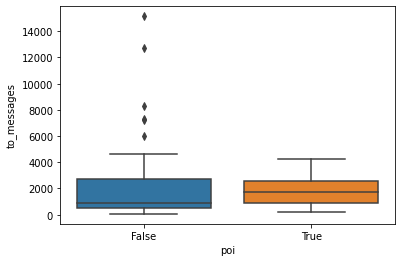

In [42]:
#To Messages:

average_to = enron.groupby('poi').mean()['to_messages']
print(average_to)

sns.boxplot(x='poi',y='to_messages',data= enron)

#不怎麼顯著，不用

poi
False    815.928571
True      60.444444
Name: from_messages, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='from_messages'>

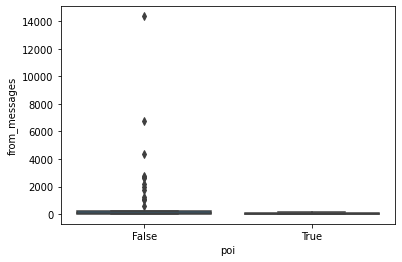

In [43]:
#From Messages:

average_from = enron.groupby('poi').mean()['from_messages']
print(average_from)

sns.boxplot(x='poi',y='from_messages',data= enron)

poi
False    569.527273
True      60.444444
Name: from_messages, dtype: float64


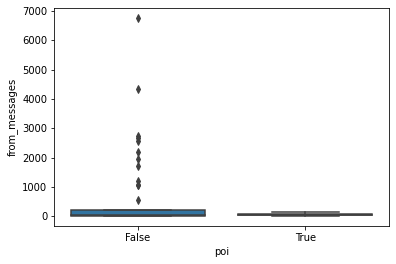

In [44]:
outlier_takeOut = enron[enron['from_messages']<14000]

average_from2 = outlier_takeOut.groupby('poi').mean()['from_messages']
print(average_from2)

sns.boxplot(x='poi',y='from_messages',data= outlier_takeOut)

#差蠻多的，可用~~
features_using.append('from_messages')

poi
False    0.130899
True     0.328700
Name: fraction_to_poi, dtype: float64


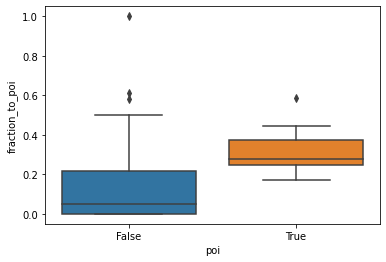

In [45]:
#Fraction to POI:

average_fraction_to = enron.groupby('poi').mean()['fraction_to_poi']
print(average_fraction_to)

sns.boxplot(x='poi',y='fraction_to_poi',data= enron)

#又一個可用的特徵~~
features_using.append('fraction_to_poi')

poi
False    0.034720
True     0.053177
Name: fraction_from_poi, dtype: float64


<AxesSubplot:xlabel='poi', ylabel='fraction_from_poi'>

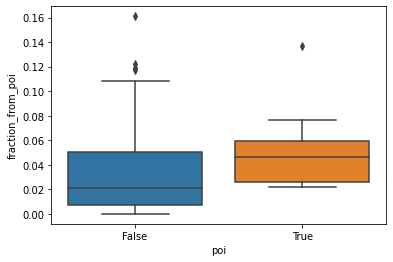

In [46]:
#Fraction from POI:

average_fraction_from = enron.groupby('poi').mean()['fraction_from_poi']
print(average_fraction_from)

sns.boxplot(x='poi',y='fraction_from_poi',data= enron)

#差不多，不用吧

In [47]:
# 最後決定有哪些可以用的特徵:
features_using

['salary',
 'bonus',
 'exercised_stock_options',
 'total_stock_value',
 'total_millions',
 'from_messages',
 'fraction_to_poi']

In [48]:
x = enron.columns

features_full_list = x.tolist()
len(features_full_list)

26

In [49]:
features_full_list.remove('name')#take out 'name'
features_full_list.remove('email_address') #take out 'email_address'
features_full_list.remove('loan_advances') #take out 'loan_advances' because of missing values
features_full_list.remove('director_fees')#take out 'director_fees' because of missing values
features_full_list.remove('poi') #take out 'poi' for now and add to beginning of list
features_list = ['poi']

for n in features_full_list:
    features_list.append(n)

print(features_list)
len(features_list)

['poi', 'bonus', 'deferral_payments', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value', 'total_bonus', 'total_millions', 'fraction_to_poi', 'fraction_from_poi']


22

In [84]:
# 遺失值填補:
enron = enron.fillna(0)
enron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       146 non-null    object 
 1   bonus                      146 non-null    float64
 2   deferral_payments          146 non-null    float64
 3   deferred_income            146 non-null    float64
 4   director_fees              146 non-null    float64
 5   email_address              146 non-null    object 
 6   exercised_stock_options    146 non-null    float64
 7   expenses                   146 non-null    float64
 8   from_messages              146 non-null    float64
 9   from_poi_to_this_person    146 non-null    float64
 10  from_this_person_to_poi    146 non-null    float64
 11  loan_advances              146 non-null    float64
 12  long_term_incentive        146 non-null    float64
 13  other                      146 non-null    float64


In [86]:
enron.to_csv('dataset_processed.csv')

In [87]:
enron

,poi,bonus,deferral_payments,deferred_income,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,...,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,total_bonus,total_millions,fraction_to_poi,fraction_from_poi
0,True,1750000.0,0.0,-3504386.0,19794175.0,46950.0,18.0,42.0,4.0,1617011.0,...,0.0,420636.0,864.0,905.0,505050.0,22542539.0,21544175.0,23.047589,0.222222,0.046409
1,True,5600000.0,0.0,0.0,19250000.0,29336.0,108.0,88.0,30.0,1920000.0,...,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0,24850000.0,34.776388,0.277778,0.024262
2,True,200000.0,0.0,-4167.0,1624396.0,22884.0,39.0,13.0,14.0,0.0,...,0.0,211844.0,91.0,225.0,2003885.0,2493616.0,1824396.0,4.497501,0.358974,0.057778
3,True,800000.0,0.0,0.0,0.0,118134.0,0.0,0.0,0.0,602671.0,...,0.0,224305.0,0.0,0.0,2652612.0,985032.0,800000.0,3.637644,0.000000,0.000000
4,True,1250000.0,0.0,-262500.0,0.0,35818.0,144.0,199.0,25.0,375304.0,...,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0,1250000.0,1.765324,0.173611,0.076597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0,1000000.0,0.0,0.0,1465734.0,38559.0,40.0,23.0,8.0,369721.0,...,0.0,213625.0,1336.0,1607.0,2047593.0,1843816.0,2465734.0,3.891409,0.200000,0.014312
29,0,1500000.0,0.0,0.0,1835558.0,0.0,92.0,28.0,23.0,554422.0,...,0.0,428780.0,2103.0,3187.0,4335388.0,3128982.0,3335558.0,7.464370,0.250000,0.008786
30,0,0.0,504610.0,0.0,2218275.0,0.0,12.0,0.0,0.0,461912.0,...,0.0,0.0,23.0,169.0,966522.0,2218275.0,2218275.0,3.184797,0.000000,0.000000
31,0,200000.0,204075.0,0.0,2549361.0,57727.0,0.0,0.0,0.0,175000.0,...,0.0,236457.0,0.0,0.0,875889.0,3064208.0,2749361.0,3.940097,0.000000,0.000000


In [77]:
# 將資料最大最小化
from sklearn.preprocessing import MinMaxScaler
enron = MinMaxScaler().fit_transform(enron)

# STEP5:使用模型

使用class weight和sample weight处理不平衡问题:
https://blog.csdn.net/xpy870663266/article/details/104600054

In [79]:
enron

array([[1.        , 0.01797755, 0.00318462, ..., 0.03096146, 0.22222222,
        0.21353003],
       [1.        , 0.05752817, 0.00318462, ..., 0.04671759, 0.27777778,
        0.1116332 ],
       [1.        , 0.00205458, 0.00318462, ..., 0.00604181, 0.35897436,
        0.26583924],
       ...,
       [0.        , 0.        , 0.01886261, ..., 0.00427836, 0.        ,
        0.        ],
       [0.        , 0.00205458, 0.00952513, ..., 0.00529301, 0.        ,
        0.        ],
       [0.        , 0.02670951, 0.00318462, ..., 0.00774134, 0.54166667,
        0.11331707]])

In [85]:
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = enron[:train_num]
test_X = enron[train_num:]

In [86]:
print('complete dataset size: ',enron.shape)

print('train_X: ',train_X.shape)
print('test_X: ',test_X.shape)
print('train_Y: ',train_Y.shape)

complete dataset size:  (146, 22)
train_X:  (113, 22)
test_X:  (33, 22)
train_Y:  (113,)


In [87]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 切分訓練集/測試集
#x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立模型 (使用 20 顆樹，每棵樹的最大深度為 4)
clf = RandomForestClassifier(n_estimators=20, max_depth=4, oob_score=True)

# 訓練模型
clf.fit(train_X, train_Y)

# 預測測試集
y_pred = clf.predict_proba(test_X)[:,1]

#acc = metrics.accuracy_score(test, y_pred)
#print("Accuracy: ", acc)

print(y_pred)

[6.17283951e-02 3.19069665e-01 1.13782051e-01 1.79487179e-02
 3.92948718e-01 2.08630104e-01 4.87500000e-01 6.17283951e-04
 1.00617284e-01 6.17283951e-04 5.92948718e-02 6.17283951e-04
 6.17283951e-04 6.17283951e-04 1.00000000e-01 6.17283951e-04
 8.81172840e-02 7.21153846e-02 1.00617284e-01 5.06172840e-02
 6.50000000e-01 2.17628205e-01 6.17283951e-04 6.17283951e-04
 6.17283951e-04 6.17283951e-04 5.44634378e-02 6.17283951e-04
 1.50296771e-01 1.63461538e-01 5.06172840e-02 5.06172840e-02
 2.04783951e-01]


In [88]:
sub = pd.DataFrame({'name': ids, 'poi': y_pred})
#sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('EnronFraud_V4.csv', index=False)

In [89]:
# check:
sub = pd.read_csv('C:/Users/USER/Desktop/Github/ML100Days/Midtern Exam_Kaggle_Project/EnronFraud_V4.csv')
sub

,name,poi
0,BELDEN TIMOTHY N,0.061728
1,BOWEN JR RAYMOND M,0.319070
2,HANNON KEVIN P,0.113782
3,DELAINEY DAVID W,0.017949
4,CAUSEY RICHARD A,0.392949
5,HICKERSON GARY J,0.208630
6,FREVERT MARK A,0.487500
7,CHAN RONNIE,0.000617
8,DONAHUE JR JEFFREY M,0.100617
9,REYNOLDS LAWRENCE,0.000617


# 0.46428